### Model Evaluation

This is a demonstration of evaluating a model. We will be using a different linear regression algorithm in the [Scikit-learn](https://scikit-learn.org/stable/) library to the course specification because it allows you to refine the model.

#### Step 1

Load the required dependencies.


In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('deeplearning.mplstyle')
from sklearn.linear_model import SGDRegressor
import pickle

####  Step 2
Open and parse the CSV file and store the data as variables.

In [2]:
training_data = pd.read_csv('course_specifications_data.csv', delimiter=',')
x = np.array(training_data.iloc[:,1]).reshape(-1, 1)
y = np.array(training_data.iloc[:,0])

#### Step 3

Use the [sklearn](https://scikit-learn.org/stable/) library to fit the model to the training data which will provide a line of best fit with the lowest cost based on a [sklearn](https://scikit-learn.org/stable/) algorithm.

In [3]:
# Create the model
my_model = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
# Fit the model to the data
my_model.fit(x, y)

SGDRegressor()

####  Step 4
Open and parse the test data CSV file and store the data as variables.

In [4]:
testing_data = pd.read_csv('model_evaluation_data.csv', delimiter=',')
x_test = np.array(testing_data.iloc[:,1]).reshape(-1, 1)
y_test = np.array(testing_data.iloc[:,0])

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

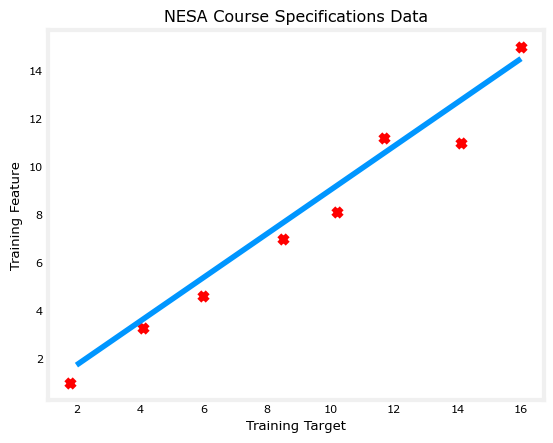

In [5]:
y_pred = my_model.predict(x)
plt.plot(x, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Training {training_data.columns[0]}')
plt.xlabel(f'Training {training_data.columns[1]}')
plt.show()

#### Step 6

Calculate a 'score' of the model to evaluate it's accuracy using the SciKit-Learn score algorithm.

In [6]:
train_score = my_model.score(x, y)
test_score = my_model.score(x_test, y_test)
print(f'Training data score: {train_score}')
print(f'Training data score: {test_score}')

Training data score: 0.9915846099650348
Training data score: 0.9569383697966509


#### Step 7

Calculate the 'cost' of the model using the test 
data.

> [!Note]
> Students should be able to state explain the cost of the model against the training data from the course specifications.

In [7]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':my_model.predict(x_test),
    'Cost' : y_test - my_model.predict(x_test).round(2)
})
print(table)

   Feature  Target  Predicted result  Cost
0      1.8     1.0          1.553522 -0.55
1      4.1     3.3          3.651453 -0.35
2      6.0     4.6          5.384527 -0.78
3      8.5     7.0          7.664887 -0.66
4     10.2     8.1          9.215532 -1.12
5     11.7    11.2         10.583748  0.62
6     14.1    11.0         12.772894 -1.77
7     16.0    15.0         14.505967  0.49


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model.

In [8]:
print(f'X Axis intercept: {my_model.intercept_}')
print(f'Coefficient: {my_model.coef_}')

X Axis intercept: [-0.08833724]
Coefficient: [0.91214403]


#### Step 9

Use the [SGDRegressor documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDRegressor.html) to fine tune your model and re-run steps 3, 4, 5, 6 & 7 to evaluate your adjustments.

#### Step 10

When you are happy with your final model save the model to file.

In [9]:
# save the model to disk
filename = 'my_saved_model.sav'
pickle.dump(my_model, open(filename, 'wb'))